In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway

In [2]:
df=pd.read_csv("Advertising.csv")

In [3]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [9]:
#inorder to set the first column heading
new_df=df.set_index("Unnamed: 0")
new_df

,TV,Radio,Newspaper,Sales
Unnamed: 0,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8


# Checking for null values

In [10]:
new_df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# 1.Explain the data set

In [11]:
new_df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [12]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


C:\Users\ollak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ollak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ollak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

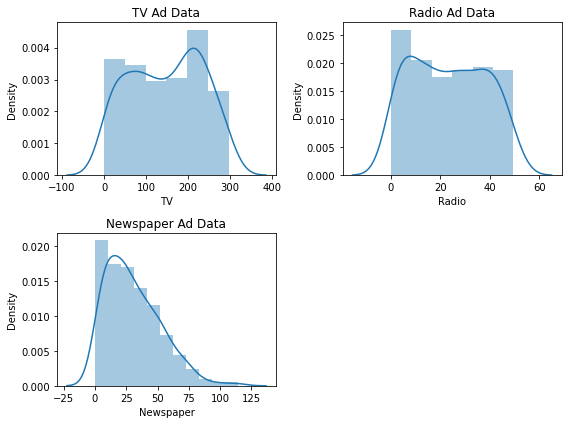

In [17]:
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
plt.title("TV Ad Data")
sns.distplot(new_df["TV"],kde=True)

plt.subplot(2,2,2)
plt.title("Radio Ad Data")
sns.distplot(new_df["Radio"],kde=True)

plt.subplot(2,2,3)
plt.title("Newspaper Ad Data")
sns.distplot(new_df["Newspaper"],kde=True)

plt.tight_layout()

The above plots shows the distribution of TV,Radio and Newspapers and it implies that most of the people depend on TV ads and thereby it shows tremendous increase in sales.

# 2.Check the summary statistics and discuss the max, min,avg, median and percentiles

In [18]:
#Summary can be found by describe function
new_df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


1. Mean,max value is much more for TV ads compares to others.

2. Radio ads takes the minimum value of zero

# 3.Manager wants to find out whether the same amount was spend for the three advertisements(TV, RADIO,News paper).Comment on your findings

{'whiskers': [<matplotlib.lines.Line2D at 0x1cbc093bd60>,
 'caps': [<matplotlib.lines.Line2D at 0x1cbc0ad3f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cbc093ba90>,
 'medians': [<matplotlib.lines.Line2D at 0x1cbc0adc550>,
 'fliers': [<matplotlib.lines.Line2D at 0x1cbc0adc820>,
 'means': []}

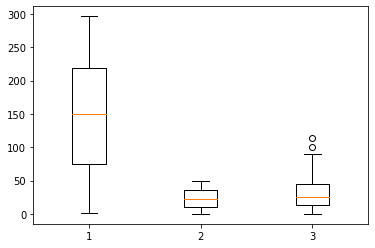

In [20]:
slice_data=new_df[["TV","Radio","Newspaper"]]
plt.boxplot(slice_data)

# Setting Hypothesis

Null hypothesis,H0 : Same amount was spend for the three advertisements

Alternative hypothesis,H1 : Different amount was spend for the three advertisements

# Conducting one way ANOVA test

In [23]:
f_value, p_value = stats.f_oneway(new_df['TV'],new_df['Radio'],new_df['Newspaper'])
print('F value : ', f_value, 'P value : ',p_value)

F value :  358.8514595342597 P value :  4.552931539744962e-103


In [26]:
if p_value <= 0.05:
    print("Rejecting the null hypothesis")
else:
    print("Accepting null hypothesis")

Rejecting the null hypothesis


So here we reject the null hypothesis and hence it is obvious that money spent on three adverstising medium were different.
It is clear that TV Ads score more among them.